In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [2]:
seed = 0
input_dim = 10
hidden_dim = 10 # 10
output_dim = input_dim
sigma = 0.5
wrap = True
input_peak_rate = 1.
learning_rate = 0.05

In [3]:
input_pattern_matrix = np.empty([input_dim,input_dim])
input_indexes = np.arange(0, input_dim)
center_index = (input_dim-1)//2
field = input_peak_rate * np.exp(-((input_indexes-center_index)/sigma)**2.)
this_random = np.random.RandomState()
this_random.seed(seed)

for i in input_indexes:
    if wrap:
        input_pattern_matrix[i,:] = np.roll(field, i-center_index)
    else:
        input_pattern_matrix[i,:] = input_peak_rate * np.exp(-((input_indexes-i)/sigma)**2.)

<IPython.core.display.Javascript object>


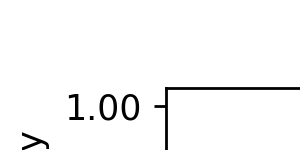

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(7,2.5))
axes[0].plot(input_indexes, field)
axes[0].set_ylabel('Input unit activity')
axes[0].set_xlabel('Latent dimension')

cbar = axes[1].imshow(input_pattern_matrix)
fig.colorbar(cbar, ax=axes[1])
axes[1].set_xlabel('Input pattern')
axes[1].set_ylabel('Input unit')
axes[1].set_title('Input activities')

fig.tight_layout()

In [5]:
initial_weight_scale = 1.
hidden_weight_scale = initial_weight_scale / input_dim
weight_matrix = this_random.uniform(-hidden_weight_scale, hidden_weight_scale, [hidden_dim, input_dim])
original_weight_matrix = np.copy(weight_matrix)

<IPython.core.display.Javascript object>


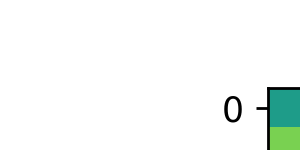

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(7,2.5))
cbar = axes[0].imshow(original_weight_matrix)
fig.colorbar(cbar, ax=axes[0])
axes[0].set_title('Hidden weights')
axes[0].set_ylabel('Hidden units')
axes[0].set_xlabel('Input units')

hidden_activities = weight_matrix.dot(input_pattern_matrix)
original_hidden_activities = np.copy(hidden_activities)
cbar = axes[1].imshow(hidden_activities)
fig.colorbar(cbar, ax=axes[1])
axes[1].set_title('Hidden activities')
axes[1].set_ylabel('Hidden units')
axes[1].set_xlabel('Input patterns')

fig.tight_layout()

In [7]:
oja_delta_w = lambda pre, post, weight, learning_rate: learning_rate * post * (pre - post * weight)

In [8]:
weight_matrix = np.copy(original_weight_matrix)
hidden_activities = np.copy(original_hidden_activities)
weight_matrix_history = []
hidden_activities_history = []
pattern_index_history = []
blocks = 4
block_size = 10
for block_o in range(blocks):
    for block_i in range(block_size):
        input_pattern_indexes = np.arange(len(input_pattern_matrix))
        this_random.shuffle(input_pattern_indexes)
        for pattern_index in input_pattern_indexes:
            delta_w_matrix = np.empty_like(weight_matrix)
            for i in range(input_dim):
                for j in range(hidden_dim):
                    delta_w_matrix[j,i] = oja_delta_w(input_pattern_matrix[i, pattern_index], hidden_activities[j,pattern_index], weight_matrix[j,i], learning_rate)
            weight_matrix = np.add(weight_matrix, delta_w_matrix)
            hidden_activities = weight_matrix.dot(input_pattern_matrix)
    weight_matrix_history.append(np.copy(weight_matrix))
    hidden_activities_history.append(np.copy(hidden_activities))

<IPython.core.display.Javascript object>


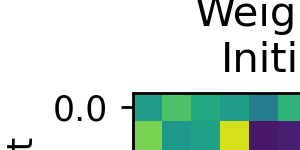

In [9]:
fig, axes = plt.subplots(2, blocks + 1, figsize=(10., 4.25))
cbar = axes[0,0].imshow(original_weight_matrix)
plt.colorbar(cbar, ax=axes[0,0])
axes[0,0].set_ylabel('Hidden unit')
axes[0,0].set_xlabel('Input unit')
axes[0,0].set_title('Weights\nInitial')
cbar = axes[1,0].imshow(original_hidden_activities)
axes[1,0].set_ylabel('Hidden unit')
axes[1,0].set_xlabel('Input pattern')
axes[1,0].set_title('Hidden activities\n')
plt.colorbar(cbar, ax=axes[1,0])
for i in range(len(hidden_activities_history)):
    cbar = axes[0,i+1].imshow(weight_matrix_history[i])
    plt.colorbar(cbar, ax=axes[0,i+1])
    axes[0,i+1].set_title('Block %i' % (i + 1))
    cbar = axes[1,i+1].imshow(hidden_activities_history[i])
    plt.colorbar(cbar, ax=axes[1,i+1])
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, hspace=0.8)
fig.show()

In [10]:
print(np.sum(original_weight_matrix ** 2., axis=1))
print(np.sum(weight_matrix ** 2., axis=1))

[0.01897313 0.04725119 0.03586926 0.02555422 0.02349226 0.03023196
 0.0430185  0.04456944 0.02729838 0.03917362]
[0.51993365 0.74646516 0.6449658  0.57477927 0.56250085 0.61421829
 0.70102443 0.72282766 0.58261137 0.65624519]


<IPython.core.display.Javascript object>


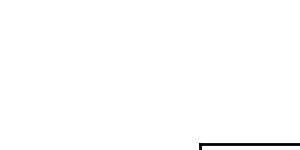

Text(0.5, 0, 'Weight')

In [11]:
min_weight = min(np.min(original_weight_matrix), np.min(weight_matrix))
max_weight = max(np.max(original_weight_matrix), np.max(weight_matrix))
edges = np.linspace(min_weight, max_weight, 20)
plt.figure()
hist, _ = np.histogram(original_weight_matrix, bins=edges)
plt.plot(edges[:-1], hist, label='Before')
hist, _ = np.histogram(weight_matrix, bins=edges)
plt.plot(edges[:-1], hist, label = 'After')
plt.legend(loc='best', frameon=False)
plt.ylabel('Count')
plt.xlabel('Weight')

In [12]:
output_weight_scale = initial_weight_scale / hidden_dim
output_weight_matrix = this_random.uniform(-output_weight_scale, output_weight_scale, [output_dim, hidden_dim])
original_output_weight_matrix = np.copy(output_weight_matrix)

<IPython.core.display.Javascript object>


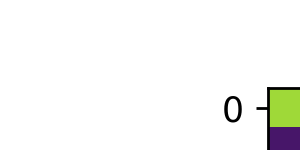

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(7,2.5))
cbar = axes[0].imshow(original_output_weight_matrix)
fig.colorbar(cbar, ax=axes[0])
axes[0].set_title('Output weights')
axes[0].set_ylabel('Output units')
axes[0].set_xlabel('Hidden units')

output_activities = output_weight_matrix.dot(hidden_activities)
original_output_activities = np.copy(output_activities)
cbar = axes[1].imshow(original_output_activities)
fig.colorbar(cbar, ax=axes[1])
axes[1].set_title('Output activities')
axes[1].set_ylabel('Output units')
axes[1].set_xlabel('Input patterns')

fig.tight_layout()

In [14]:
# drive Oja with the target output
output_weight_matrix = np.copy(original_output_weight_matrix)
output_activities = np.copy(original_output_activities)
output_weight_matrix_history = []
output_activities_history = []
blocks = 4
block_size = 10
for block_o in range(blocks):
    for block_i in range(block_size):
        input_pattern_indexes = np.arange(len(input_pattern_matrix))
        this_random.shuffle(input_pattern_indexes)
        for pattern_index in input_pattern_indexes:
            this_input = input_pattern_matrix[:,pattern_index]
            target_post = this_input
            delta_w_matrix = np.empty_like(output_weight_matrix)
            for j in range(hidden_dim):
                for k in range(output_dim):
                    delta_w_matrix[k,j] = oja_delta_w(hidden_activities[j,pattern_index], target_post[k], output_weight_matrix[k,j], learning_rate)
            output_weight_matrix = np.add(output_weight_matrix, delta_w_matrix)
            output_activities = output_weight_matrix.dot(hidden_activities)
    output_weight_matrix_history.append(np.copy(output_weight_matrix))
    output_activities_history.append(np.copy(output_activities))

<IPython.core.display.Javascript object>


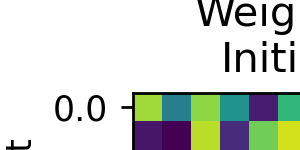

In [15]:
fig, axes = plt.subplots(2, blocks + 1, figsize=(10., 4.25))
cbar = axes[0,0].imshow(original_output_weight_matrix)
plt.colorbar(cbar, ax=axes[0,0])
axes[0,0].set_ylabel('Output unit')
axes[0,0].set_xlabel('Hidden unit')
axes[0,0].set_title('Weights\nInitial')
cbar = axes[1,0].imshow(original_output_activities)
axes[1,0].set_ylabel('Output unit')
axes[1,0].set_xlabel('Input pattern')
axes[1,0].set_title('Output activities\n')
plt.colorbar(cbar, ax=axes[1,0])
for i in range(len(output_activities_history)):
    cbar = axes[0,i+1].imshow(output_weight_matrix_history[i])
    plt.colorbar(cbar, ax=axes[0,i+1])
    axes[0,i+1].set_title('Block %i' % (i + 1))
    cbar = axes[1,i+1].imshow(output_activities_history[i])
    plt.colorbar(cbar, ax=axes[1,i+1])
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, hspace=0.8)
fig.show()

In [16]:
np.argmax(output_activities, axis=0)

array([0, 7, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
# drive Oja with the delta (target - output)
output_weight_matrix = np.copy(original_output_weight_matrix)
output_activities = np.copy(original_output_activities)
output_weight_matrix_history = []
output_activities_history = []
blocks = 4
block_size = 10
for block_o in range(blocks):
    for block_i in range(block_size):
        input_pattern_indexes = np.arange(len(input_pattern_matrix))
        this_random.shuffle(input_pattern_indexes)
        for pattern_index in input_pattern_indexes:
            this_input = input_pattern_matrix[:,pattern_index]
            target_post = this_input
            delta_post = np.subtract(target_post, output_activities[:,pattern_index])
            delta_w_matrix = np.empty_like(output_weight_matrix)
            for j in range(hidden_dim):
                for k in range(output_dim):
                    delta_w_matrix[k,j] = oja_delta_w(hidden_activities[j,pattern_index], delta_post[k], output_weight_matrix[k,j], learning_rate)
            output_weight_matrix = np.add(output_weight_matrix, delta_w_matrix)
            output_activities = output_weight_matrix.dot(hidden_activities)
    output_weight_matrix_history.append(np.copy(output_weight_matrix))
    output_activities_history.append(np.copy(output_activities))

<IPython.core.display.Javascript object>


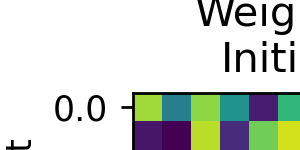

In [18]:
fig, axes = plt.subplots(2, blocks + 1, figsize=(10., 4.25))
cbar = axes[0,0].imshow(original_output_weight_matrix)
plt.colorbar(cbar, ax=axes[0,0])
axes[0,0].set_ylabel('Output unit')
axes[0,0].set_xlabel('Hidden unit')
axes[0,0].set_title('Weights\nInitial')
cbar = axes[1,0].imshow(original_output_activities)
axes[1,0].set_ylabel('Output unit')
axes[1,0].set_xlabel('Input pattern')
axes[1,0].set_title('Output activities\n')
plt.colorbar(cbar, ax=axes[1,0])
for i in range(len(output_activities_history)):
    cbar = axes[0,i+1].imshow(output_weight_matrix_history[i])
    plt.colorbar(cbar, ax=axes[0,i+1])
    axes[0,i+1].set_title('Block %i' % (i + 1))
    cbar = axes[1,i+1].imshow(output_activities_history[i])
    plt.colorbar(cbar, ax=axes[1,i+1])
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, hspace=0.8)
fig.show()

In [19]:
print(np.sum(original_output_weight_matrix ** 2., axis=1))
print(np.sum(output_weight_matrix ** 2., axis=1))

[0.03101742 0.04663891 0.01857251 0.04621614 0.0340071  0.04484508
 0.03492811 0.03494061 0.02093114 0.03186905]
[0.17238372 0.1452718  0.27989465 0.18864303 0.30734369 0.26352588
 0.23237316 0.2885115  0.25172919 0.40895184]


In [20]:
np.argmax(output_activities, axis=0)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [21]:
from scipy.optimize import least_squares

In [22]:
def least_sq_output(w, hidden_activities, target):
    output_activities = w.reshape(original_output_weight_matrix.shape).dot(hidden_activities)
    return target.flatten() - output_activities.flatten()

In [23]:
result = least_squares(least_sq_output, original_output_weight_matrix.flatten(), args=(hidden_activities, input_pattern_matrix),
                      bounds=(-1.,1.))

In [24]:
result

 active_mask: array([ 0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0, -1,  0,  1,  0,  0, -1,
        0,  0,  0,  0,  0, -1,  1,  0,  0,  0,  1, -1,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  1,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  1,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0])
        cost: 0.5106982587854323
         fun: array([ 3.86243762e-01, -6.86479525e-02, -1.50050475e-01, -1.17602101e-01,
       -8.80214157e-02,  1.53856717e-01,  4.15839819e-02, -1.50159546e-01,
        1.15909312e-01,  1.30414827e-02, -1.41645276e-01,  2.77007473e-01,
       -2.51883800e-02, -5.95303425e-02,  8.64969626e-02, -1.55200225e-01,
       -1.22325474e-02,  9.13317990e-02, -1.19656298e-01,  4.73340162e-02,
       -4.62307935e-02,  4.64950545e-03,  1.36400594e-01,  1.51236547e-01,
       -2.62034373e-02,  8.14828938e-02,  2.15

<IPython.core.display.Javascript object>


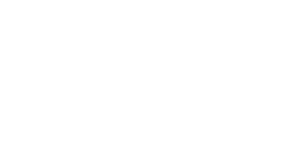

In [25]:
least_sq_output_weights = np.array(result.x).reshape(output_weight_matrix.shape)

fig, axes = plt.subplots(1, 2, figsize=(7,2.5))
cbar = axes[0].imshow(least_sq_output_weights)
fig.colorbar(cbar, ax=axes[0])
axes[0].set_title('Output weights')
axes[0].set_ylabel('Output units')
axes[0].set_xlabel('Hidden units')

least_sq_output_activities = least_sq_output_weights.dot(hidden_activities)
cbar = axes[1].imshow(least_sq_output_activities)
fig.colorbar(cbar, ax=axes[1])
axes[1].set_title('Output activities')
axes[1].set_ylabel('Output units')
axes[1].set_xlabel('Input patterns')
fig.suptitle('Least squares')
fig.tight_layout()

In [26]:
np.argmax(least_sq_output_activities, axis=0)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [27]:
print(np.sum(least_sq_output_weights ** 2., axis=1))

[4.43839014 4.25901926 4.66672522 5.33975049 3.09267631 5.63851528
 2.72603847 4.15690786 4.46609313 2.86617139]


In [28]:
# Simultaneous training hidden + output layers
# drive Oja with the target output

weight_matrix = np.copy(original_weight_matrix)
hidden_activities = np.copy(original_hidden_activities)
weight_matrix_history = []
hidden_activities_history = []
output_weight_matrix = np.copy(original_output_weight_matrix)
output_activities = np.copy(original_output_activities)
output_weight_matrix_history = []
output_activities_history = []

blocks = 4
block_size = 10
for block_o in range(blocks):
    for block_i in range(block_size):
        input_pattern_indexes = np.arange(len(input_pattern_matrix))
        this_random.shuffle(input_pattern_indexes)
        for pattern_index in input_pattern_indexes:
            delta_w_matrix = np.empty_like(weight_matrix)
            for i in range(input_dim):
                for j in range(hidden_dim):
                    delta_w_matrix[j,i] = oja_delta_w(input_pattern_matrix[i, pattern_index], hidden_activities[j,pattern_index], weight_matrix[j,i], learning_rate)
            weight_matrix = np.add(weight_matrix, delta_w_matrix)
            hidden_activities = weight_matrix.dot(input_pattern_matrix)
            this_input = input_pattern_matrix[:,pattern_index]
            target_post = this_input
            delta_w_matrix = np.empty_like(output_weight_matrix)
            for j in range(hidden_dim):
                for k in range(output_dim):
                    delta_w_matrix[k,j] = oja_delta_w(hidden_activities[j,pattern_index], target_post[k], output_weight_matrix[k,j], learning_rate)
            output_weight_matrix = np.add(output_weight_matrix, delta_w_matrix)
            output_activities = output_weight_matrix.dot(hidden_activities)         
    weight_matrix_history.append(np.copy(weight_matrix))
    hidden_activities_history.append(np.copy(hidden_activities))
    output_weight_matrix_history.append(np.copy(output_weight_matrix))
    output_activities_history.append(np.copy(output_activities))

<IPython.core.display.Javascript object>


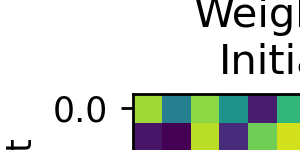

In [29]:
fig, axes = plt.subplots(2, blocks + 1, figsize=(10., 4.25))
cbar = axes[0,0].imshow(original_output_weight_matrix)
plt.colorbar(cbar, ax=axes[0,0])
axes[0,0].set_ylabel('Output unit')
axes[0,0].set_xlabel('Hidden unit')
axes[0,0].set_title('Weights\nInitial')
cbar = axes[1,0].imshow(original_output_activities)
axes[1,0].set_ylabel('Output unit')
axes[1,0].set_xlabel('Input pattern')
axes[1,0].set_title('Output activities\n')
plt.colorbar(cbar, ax=axes[1,0])
for i in range(len(output_activities_history)):
    cbar = axes[0,i+1].imshow(output_weight_matrix_history[i])
    plt.colorbar(cbar, ax=axes[0,i+1])
    axes[0,i+1].set_title('Block %i' % (i + 1))
    cbar = axes[1,i+1].imshow(output_activities_history[i])
    plt.colorbar(cbar, ax=axes[1,i+1])
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, hspace=0.8)
fig.show()

In [30]:
np.argmax(output_activities, axis=0)

array([0, 7, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
# Simultaneous training hidden + output layers
# drive Oja with the delta (target - output)

weight_matrix = np.copy(original_weight_matrix)
hidden_activities = np.copy(original_hidden_activities)
weight_matrix_history = []
hidden_activities_history = []
output_weight_matrix = np.copy(original_output_weight_matrix)
output_activities = np.copy(original_output_activities)
output_weight_matrix_history = []
output_activities_history = []

blocks = 4
block_size = 10
for block_o in range(blocks):
    for block_i in range(block_size):
        input_pattern_indexes = np.arange(len(input_pattern_matrix))
        this_random.shuffle(input_pattern_indexes)
        for pattern_index in input_pattern_indexes:
            delta_w_matrix = np.empty_like(weight_matrix)
            for i in range(input_dim):
                for j in range(hidden_dim):
                    delta_w_matrix[j,i] = oja_delta_w(input_pattern_matrix[i, pattern_index], hidden_activities[j,pattern_index], weight_matrix[j,i], learning_rate)
            weight_matrix = np.add(weight_matrix, delta_w_matrix)
            hidden_activities = weight_matrix.dot(input_pattern_matrix)
            this_input = input_pattern_matrix[:,pattern_index]
            target_post = this_input
            delta_post = np.subtract(target_post, output_activities[:,pattern_index])
            delta_w_matrix = np.empty_like(output_weight_matrix)
            for j in range(hidden_dim):
                for k in range(output_dim):
                    delta_w_matrix[k,j] = oja_delta_w(hidden_activities[j,pattern_index], delta_post[k], output_weight_matrix[k,j], learning_rate)
            output_weight_matrix = np.add(output_weight_matrix, delta_w_matrix)
            output_activities = output_weight_matrix.dot(hidden_activities)         
    weight_matrix_history.append(np.copy(weight_matrix))
    hidden_activities_history.append(np.copy(hidden_activities))
    output_weight_matrix_history.append(np.copy(output_weight_matrix))
    output_activities_history.append(np.copy(output_activities))

<IPython.core.display.Javascript object>


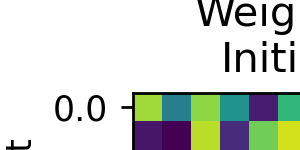

In [32]:
fig, axes = plt.subplots(2, blocks + 1, figsize=(10., 4.25))
cbar = axes[0,0].imshow(original_output_weight_matrix)
plt.colorbar(cbar, ax=axes[0,0])
axes[0,0].set_ylabel('Output unit')
axes[0,0].set_xlabel('Hidden unit')
axes[0,0].set_title('Weights\nInitial')
cbar = axes[1,0].imshow(original_output_activities)
axes[1,0].set_ylabel('Output unit')
axes[1,0].set_xlabel('Input pattern')
axes[1,0].set_title('Output activities\n')
plt.colorbar(cbar, ax=axes[1,0])
for i in range(len(output_activities_history)):
    cbar = axes[0,i+1].imshow(output_weight_matrix_history[i])
    plt.colorbar(cbar, ax=axes[0,i+1])
    axes[0,i+1].set_title('Block %i' % (i + 1))
    cbar = axes[1,i+1].imshow(output_activities_history[i])
    plt.colorbar(cbar, ax=axes[1,i+1])
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, hspace=0.8)
fig.show()

In [33]:
np.argmax(output_activities, axis=0)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])